In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from hyperopt import *
from optuna import *
import matplotlib.pyplot as plt

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Aalisis de la base de daos:

In [6]:
datos = pd.read_excel("Cartera_TarifarVF.xlsx")

In [7]:
datos.isnull().sum()

ASEGURADO       0
RANGO ETARIO    0
Género          0
CIUDAD          0
OCUPACIÓN       0
COBERTURA       0
dtype: int64

In [96]:
gen = datos["Género"]
rang_et = datos["RANGO ETARIO"]
ciu = datos["CIUDAD"]
ocup = datos["OCUPACIÓN"]


### Proporcion de mujeres y hombres en la base de datos:

In [49]:
masculino = 0
femenino = 0
for i in range(0,int(len(gen)),6):
    if gen[i] == "Masculino":
        masculino +=1
    else: #gen[i] == "Femenino":
        femenino +=1

print(f"En total la base de datos cuneta con {masculino} pacientes masculino, lo cual es {100*(masculino/int(len(gen)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {femenino} pacientes femeninas, lo cual es {100*(femenino/int(len(gen)/6))}% del ottal de pacientes")


EN total la base de datos cuneta con 50279 pacientes masculino, lo cual es 50.27950279502795% del ottal de pacientes
EN total la base de datos cuneta con 49720 pacientes femeninas, lo cual es 49.72049720497205% del ottal de pacientes


### Rango Etario

In [72]:
Rango = []

for i in range(0,int(len(gen)),6):
    if rang_et[i][2:] == '-mas':
        Rango.append(int(rang_et[i][:2]))
    elif rang_et[i][2] == '-':
        Rango.append(int(rang_et[i][3:]))
    else:
        Rango.append(int(rang_et[i][2:]))

En total los pacientres entre 0-14 años son: 14102
En total los pacientres entre 15-40 años son: 14397
En total los pacientres entre 40-50 años son: 14392
En total los pacientres entre 51-59 años son: 14372
En total los pacientres entre 60-65 años son: 14351
En total los pacientres entre 66-70 años son: 14239
En total los pacientres entre 71-mas años son: 14239


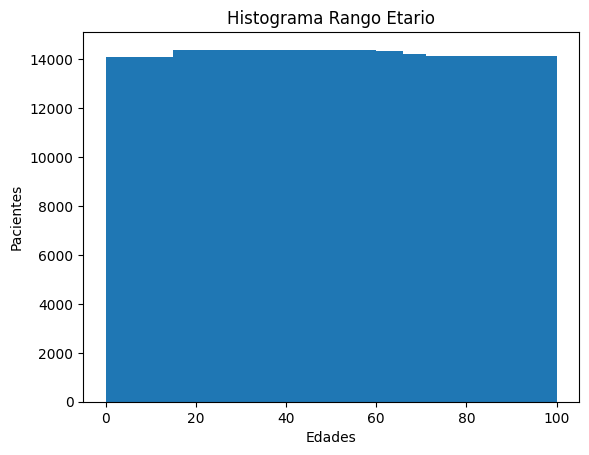

In [88]:
plt.hist(Rango, bins =[0 ,15, 41, 51, 60, 66, 71, 100])
plt.title("Histograma Rango Etario")
plt.xlabel('Edades')
plt.ylabel('Pacientes')

print(f"En total los pacientres entre 0-14 años son: {Rango.count(14)}")
print(f"En total los pacientres entre 15-40 años son: {Rango.count(40)}")
print(f"En total los pacientres entre 40-50 años son: {Rango.count(50)}")
print(f"En total los pacientres entre 51-59 años son: {Rango.count(59)}")
print(f"En total los pacientres entre 60-65 años son: {Rango.count(65)}")
print(f"En total los pacientres entre 66-70 años son: {Rango.count(70)}")
print(f"En total los pacientres entre 71-mas años son: {Rango.count(70)}")


### Ciudad

In [95]:
reg_centro = 0
reg_antioquia= 0
reg_eje_cafetero =0 
reg_norte = 0
reg_occidente = 0 

for i in range(0,int(len(ciu)),6):
    if ciu[i] == "REGIONAL CENTRO":
        reg_centro +=1
    elif ciu[i] == "REGIONAL NORTE":
        reg_norte +=1
    elif ciu[i] == "REGIONAL EJE CAFETERO":
        reg_eje_cafetero +=1
    elif ciu[i] == "REGIONAL OCCIDENTE":
        reg_occidente +=1
    elif ciu[i] == "REGIONAL ANTIOQUIA":
        reg_antioquia +=1
    
Total = [reg_centro, reg_antioquia, reg_eje_cafetero, reg_norte, reg_occidente]

print(f"En total la base de datos cuneta con {reg_centro} pacientes habitando en la Regional Centro, lo cual es {100*(reg_centro/int(len(ciu)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {reg_antioquia} pacientes habitando en la Regional Antioquia, lo cual es {100*(reg_antioquia/int(len(ciu)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {reg_eje_cafetero} pacientes habitando en la Regional Eje Cafetero, lo cual es {100*(reg_eje_cafetero/int(len(ciu)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {reg_norte} pacientes habitando en la Regional Norte, lo cual es {100*(reg_norte/int(len(ciu)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {reg_occidente} pacientes habitando en la Regional Occidente, lo cual es {100*(reg_occidente/int(len(ciu)/6))}% del ottal de pacientes")


En total la base de datos cuneta con 20029 pacientes habitando en la Regional Centro, lo cual es 20.02920029200292% del ottal de pacientes
En total la base de datos cuneta con 20076 pacientes habitando en la Regional Antioquia, lo cual es 20.07620076200762% del ottal de pacientes
En total la base de datos cuneta con 20116 pacientes habitando en la Regional Eje Cafetero, lo cual es 20.11620116201162% del ottal de pacientes
En total la base de datos cuneta con 19975 pacientes habitando en la Regional Norte, lo cual es 19.97519975199752% del ottal de pacientes
En total la base de datos cuneta con 19803 pacientes habitando en la Regional Occidente, lo cual es 19.803198031980322% del ottal de pacientes


### Ocupacion: 

In [97]:
est = 0
constr = 0
med = 0 
prog = 0
pens = 0 

for i in range(0,int(len(ciu)),6):
    if ocup[i] == "Estudiante":
        est +=1
    elif ocup[i] == "Pensionado":
        pens +=1
    elif ocup[i] == "Programador":
        prog +=1
    elif ocup[i] == "Médico":
        med +=1
    elif ocup[i] == "Constructor":
        constr +=1
    
Total = [reg_centro, reg_antioquia, reg_eje_cafetero, reg_norte, reg_occidente]

print(f"En total la base de datos cuneta con {est} pacientes que son estudiantes, lo cual es {100*(est/int(len(ciu)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {constr} pacientes que son constructores, lo cual es {100*(constr/int(len(ciu)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {med} pacientes que son medicos, lo cual es {100*(med/int(len(ciu)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {prog} pacientes que son programadores, lo cual es {100*(prog/int(len(ciu)/6))}% del ottal de pacientes")
print(f"En total la base de datos cuneta con {pens} pacientes que son pensionados, lo cual es {100*(pens/int(len(ciu)/6))}% del ottal de pacientes")


En total la base de datos cuneta con 14102 pacientes que son estudiantes, lo cual es 14.102141021410214% del ottal de pacientes
En total la base de datos cuneta con 24020 pacientes que son constructores, lo cual es 24.020240202402025% del ottal de pacientes
En total la base de datos cuneta con 23694 pacientes que son medicos, lo cual es 23.69423694236942% del ottal de pacientes
En total la base de datos cuneta con 24037 pacientes que son programadores, lo cual es 24.037240372403723% del ottal de pacientes
En total la base de datos cuneta con 14146 pacientes que son pensionados, lo cual es 14.146141461414613% del ottal de pacientes


## Modelo predictivo

### Division de los datos

In [5]:
entrenamineto = pd.read_excel("BD_Salud.xlsx")

In [119]:
entre_modelo1 = entrenamineto.drop(columns=["ASEGURADO", "Edad", "VALOR SINIESTRO", "SEVERIDAD", "MES OCURRENCIA"]) #Frecuencia 
entre_modelo2 = entrenamineto.drop(columns=["ASEGURADO", "Edad", "VALOR SINIESTRO", "Frecuencia", "MES OCURRENCIA"]) #Severidad
entre_modelo2 = entre_modelo2[entre_modelo2["SEVERIDAD"] != 0]

In [120]:
entre_modelo1_reg = entre_modelo1.copy()
entre_modelo1_reg = entre_modelo1.copy()

dummies = pd.get_dummies(entre_modelo1_reg['RANGO ETARIO'])
entre_modelo1_reg = pd.concat([entre_modelo1_reg, dummies], axis=1)
entre_modelo1_reg.drop('RANGO ETARIO', axis=1, inplace=True)

dummies = pd.get_dummies(entre_modelo1_reg['Género'], prefix='Genero')
entre_modelo1_reg = pd.concat([entre_modelo1_reg, dummies], axis=1)
entre_modelo1_reg.drop('Género', axis=1, inplace=True)
entre_modelo1_reg.drop('Genero_Femenino', axis=1, inplace=True)

dummies = pd.get_dummies(entre_modelo1_reg['CIUDAD'])
entre_modelo1_reg = pd.concat([entre_modelo1_reg, dummies], axis=1)
entre_modelo1_reg.drop('CIUDAD', axis=1, inplace=True)

dummies = pd.get_dummies(entre_modelo1_reg['OCUPACIÓN'])
entre_modelo1_reg = pd.concat([entre_modelo1_reg, dummies], axis=1)
entre_modelo1_reg.drop('OCUPACIÓN', axis=1, inplace=True)

dummies = pd.get_dummies(entre_modelo1_reg['COBERTURA'])
entre_modelo1_reg = pd.concat([entre_modelo1_reg, dummies], axis=1)
entre_modelo1_reg.drop('COBERTURA', axis=1, inplace=True)

In [121]:
entre_modelo2_reg = test.copy()
test_reg = test.copy()

dummies = pd.get_dummies(test_reg['RANGO ETARIO'])
test_reg = pd.concat([entre_modelo2_reg, dummies], axis=1)
entre_modelo2_reg.drop('RANGO ETARIO', axis=1, inplace=True)

dummies = pd.get_dummies(entre_modelo2_reg['Género'], prefix='Genero')
entre_modelo2_reg = pd.concat([entre_modelo2_reg, dummies], axis=1)
entre_modelo2_reg.drop('Género', axis=1, inplace=True)
entre_modelo2_reg.drop('Genero_Femenino', axis=1, inplace=True)

dummies = pd.get_dummies(entre_modelo2_reg['CIUDAD'])
entre_modelo2_reg = pd.concat([entre_modelo2_reg, dummies], axis=1)
entre_modelo2_reg.drop('CIUDAD', axis=1, inplace=True)

dummies = pd.get_dummies(entre_modelo2_reg['OCUPACIÓN'])
entre_modelo2_reg = pd.concat([entre_modelo2_reg, dummies], axis=1)
entre_modelo2_reg.drop('OCUPACIÓN', axis=1, inplace=True)

dummies = pd.get_dummies(entre_modelo2_reg['COBERTURA'])
entre_modelo2_reg = pd.concat([entre_modelo2_reg, dummies], axis=1)
entre_modelo2_reg.drop('COBERTURA', axis=1, inplace=True)

# Primeros modelos

### Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
\
        # Modelo Frecunecia (modelo 1)

X1 = entre_modelo1_reg[entre_modelo1_reg.columns[1:]]
y1 = entre_modelo1_reg[entre_modelo1_reg.columns[0]]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

rand_forest = RandomForestRegressor(n_estimators= 100, criterion= 'squared_error', max_depth=None)

rand_forest.fit(X_train1, y_train1)

predicciones = rand_forest.predict(X_test1)

precision = mean_squared_error(y_test1, predicciones)

print(f'El MSE optenido para el modelo de Frecuencia es de: {precision}')
print(np.mean(predicciones))


        # Modelo Severidad (modelo 2)

X1 = entre_modelo2_reg[entre_modelo2_reg.columns[1:]]
y1 = entre_modelo2_reg[entre_modelo2_reg.columns[0]]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

rand_forest = RandomForestRegressor(n_estimators= 100, criterion= 'squared_error', max_depth=None)

rand_forest.fit(X_train1, y_train1)

predicciones = rand_forest.predict(X_test1)

precision = mean_squared_error(y_test1, predicciones)

print(f'El MSE optenido para el modelo de Severidad es de: {precision}')
print(np.mean(predicciones))


El MSE optenido para el modelo de Frecuencia es de: 12.223249948965725
1.6611178051768687
El MSE optenido para el modelo de Severidad es de: 18033319813078.67
1853784.4941605863


## Regresion de Poisson

In [194]:
from sklearn.linear_model import PoissonRegressor
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

        # Modelo Frecunecia (modelo 1)

X1 = entre_modelo1_reg[entre_modelo1_reg.columns[1:]]
y1 = entre_modelo1_reg[entre_modelo1_reg.columns[0]]


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

reg_pois = PoissonRegressor(alpha =0.0022)

reg_pois.fit(X_train1, y_train1)

predicciones = reg_pois.predict(X_test1)

MSE = mean_squared_error(y_test1, predicciones)

print(f'Para el modelo de Frecuencia el error cuadratico medio es de: {MSE}')
print(predicciones)

        # Modelo Severidad

X1 = entre_modelo2_reg[entre_modelo2_reg.columns[1:]]
y1 = entre_modelo2_reg[entre_modelo2_reg.columns[0]]


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

reg_pois = PoissonRegressor(alpha = 0.001)

reg_pois.fit(X_train1, y_train1)

predicciones = reg_pois.predict(X_test1)

MSE = mean_squared_error(y_test1, predicciones)

print(f'Para el modelo de Severidad el error cuadratico medio es de: {MSE}')

print(np.mean(predicciones))

Para el modelo de Frecuencia el error cuadratico medio es de: 12.201423805855892
[0.11106858 0.46369733 1.68567732 ... 0.45945321 0.10924971 0.45863549]
Para el modelo de Severidad el error cuadratico medio es de: 17855194635395.895
1852432.2619019388


In [242]:
    #RMSE
np.sqrt(12.201423805855892)

3.4930536505836685

### Redes Neuronales

In [105]:
from sklearn.neural_network import MLPRegressor
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

        # Modelo Frecunecia (modelo 1)

X1 = entre_modelo1_reg[entre_modelo1_reg.columns[1:]]
y1 = entre_modelo1_reg[entre_modelo1_reg.columns[0]]


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

red_neu = MLPRegressor(activation= "relu", solver="adam", alpha= 0.0001)

red_neu.fit(X_train1, y_train1)

predicciones = red_neu.predict(X_test1)

MSE = mean_squared_error(y_test1, predicciones)

print(f'Para el modelo de Frecuencia el error cuadratico medio es de: {MSE}')

Para el modelo de Frecuencia el error cuadratico medio es de: 12.217447912702072
Para el modelo de Frecuencia el R^2 es de: 0.17847201655943357


### Regresion Gamma 

In [236]:
from sklearn.linear_model import GammaRegressor
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Modelo Severidad

X2 = entre_modelo2_reg[entre_modelo2_reg.columns[1:]]
y2 = entre_modelo2_reg[entre_modelo2_reg.columns[0]]


X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.25, random_state=42)

reg_gamma = GammaRegressor(alpha = 0.5)

reg_gamma.fit(X_train1, y_train1)

predicciones = reg_gamma.predict(X_test1)

MSE = mean_squared_error(y_test1, predicciones)

print(f'Para el modelo de Severidad el error cuadratico medio es de: {MSE}')

print(np.mean(predicciones))
print(np.var(predicciones))

Para el modelo de Severidad el error cuadratico medio es de: 65373578543687.734
796691.8523749806
206480839177.658


In [243]:
    #RMSE
np.sqrt(65373578543687.734)

8085392.9121402465

# Optuna (optimizacion de hiperparametros)

In [152]:
X1 = entre_modelo1_reg[entre_modelo1_reg.columns[1:]]
y1 = entre_modelo1_reg[entre_modelo1_reg.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

### Regresion de Poisson (Frecuencia)

In [155]:
import optuna
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.

    alfa = trial.suggest_float('alfa', 1e-5, 1, log=True)

    poiss = PoissonRegressor(alpha = alfa)

    poiss.fit(X_train, y_train)
    y_pred = poiss.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred)

    return mse  # An objective value linked with the Trial object.

studyPoiss = optuna.create_study(direction='minimize')  # Create a new study.
studyPoiss.optimize(objective, n_trials=100)  # Invoke optimization of the objective function.

studyPoiss.best_params

[I 2024-02-27 14:58:17,541] A new study created in memory with name: no-name-b0633e51-5c00-4c9c-9e0b-ba207c07e728


Para el modelo de Frecuencia el error cuadratico medio es de: 17855194635395.895
1852432.2619019388


[I 2024-02-27 14:58:18,092] Trial 0 finished with value: 12.17018186034376 and parameters: {'alfa': 0.00436583995248874}. Best is trial 0 with value: 12.17018186034376.
[I 2024-02-27 14:58:18,694] Trial 1 finished with value: 12.169950580326367 and parameters: {'alfa': 0.0017339762977615458}. Best is trial 1 with value: 12.169950580326367.
[I 2024-02-27 14:58:19,087] Trial 2 finished with value: 12.209063550455662 and parameters: {'alfa': 0.038466725111528724}. Best is trial 1 with value: 12.169950580326367.
[I 2024-02-27 14:58:19,437] Trial 3 finished with value: 12.170185686501119 and parameters: {'alfa': 2.8277599352167882e-05}. Best is trial 1 with value: 12.169950580326367.
[I 2024-02-27 14:58:19,781] Trial 4 finished with value: 12.170190310591213 and parameters: {'alfa': 1.1773766014476558e-05}. Best is trial 1 with value: 12.169950580326367.
[I 2024-02-27 14:58:19,998] Trial 5 finished with value: 13.643329382868286 and parameters: {'alfa': 0.9200860957963037}. Best is trial 1 

{'alfa': 0.002248529752069728}

In [160]:
X = entre_modelo2_reg[entre_modelo2_reg.columns[1:]]
y = entre_modelo2_reg[entre_modelo2_reg.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

### Regresion Gamma (Severidad)

In [167]:
import optuna
from sklearn.linear_model import GammaRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.

    alfa = trial.suggest_float('alfa', 1e-2, 1, log=True)

    gamma = GammaRegressor(alpha = alfa)

    gamma.fit(X_train, y_train)
    y_pred = gamma.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred)

    return mse  # An objective value linked with the Trial object.

studyGamma = optuna.create_study(direction='minimize')  # Create a new study.
studyGamma.optimize(objective, n_trials=100)  # Invoke optimization of the objective function.

studyGamma.best_params

[I 2024-02-27 15:15:37,857] A new study created in memory with name: no-name-5f07d6d0-98ed-4d3f-9919-047d9aacc4e8
[I 2024-02-27 15:15:37,936] Trial 0 finished with value: 58769747697038.58 and parameters: {'alfa': 0.0960068836774565}. Best is trial 0 with value: 58769747697038.58.
[I 2024-02-27 15:15:38,003] Trial 1 finished with value: 68075598093479.79 and parameters: {'alfa': 0.6368467117188563}. Best is trial 0 with value: 58769747697038.58.
[I 2024-02-27 15:15:38,074] Trial 2 finished with value: 63391328218130.02 and parameters: {'alfa': 0.17262173216302878}. Best is trial 0 with value: 58769747697038.58.
[I 2024-02-27 15:15:38,194] Trial 3 finished with value: 30799831395156.617 and parameters: {'alfa': 0.011993957081596944}. Best is trial 3 with value: 30799831395156.617.
[I 2024-02-27 15:15:38,264] Trial 4 finished with value: 67843557870166.36 and parameters: {'alfa': 0.570709900847078}. Best is trial 3 with value: 30799831395156.617.
[I 2024-02-27 15:15:38,348] Trial 5 finis

{'alfa': 0.010005031899044529}

# Predicciones finales:

In [185]:
data = pd.read_excel("Cartera_TarifarVF.xlsx")
datos = data.drop(columns=["ASEGURADO"])

In [186]:
test = datos.copy()

dummies = pd.get_dummies(test['RANGO ETARIO'])
test = pd.concat([test, dummies], axis=1)
test.drop('RANGO ETARIO', axis=1, inplace=True)

dummies = pd.get_dummies(test['Género'], prefix='Genero')
test = pd.concat([test, dummies], axis=1)
test.drop('Género', axis=1, inplace=True)
test.drop('Genero_Femenino', axis=1, inplace=True)

dummies = pd.get_dummies(test['CIUDAD'])
test = pd.concat([test, dummies], axis=1)
test.drop('CIUDAD', axis=1, inplace=True)

dummies = pd.get_dummies(test['OCUPACIÓN'])
test = pd.concat([test, dummies], axis=1)
test.drop('OCUPACIÓN', axis=1, inplace=True)

dummies = pd.get_dummies(test['COBERTURA'])
test = pd.concat([test, dummies], axis=1)
test.drop('COBERTURA', axis=1, inplace=True)

In [239]:
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import PoissonRegressor
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X2 = entre_modelo2_reg[entre_modelo2_reg.columns[1:]]
y2 = entre_modelo2_reg[entre_modelo2_reg.columns[0]]



reg_gamma = GammaRegressor(alpha = 0.3)

reg_gamma.fit(X2, y2)

predicciones_severidad = reg_gamma.predict(test)
severidad = predicciones_severidad.tolist()

severidad = np.array(severidad)
#severidad_int = severidad.astype(int)


X1 = entre_modelo1_reg[entre_modelo1_reg.columns[1:]]
y1 = entre_modelo1_reg[entre_modelo1_reg.columns[0]]

reg_pois = PoissonRegressor(alpha =0.0022)

reg_pois.fit(X1, y1)

predicciones_frecuencia = reg_pois.predict(test)
frecuencia = predicciones_frecuencia.tolist()
frecuencia = np.array(frecuencia)
#frecuencia_int = frecuencia.astype(int)

In [240]:
data["Severidad"] = severidad
data["Frecuencia"] = frecuencia